In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = pd.read_csv("./data/193.csv", delimiter=";", quotechar="|", index_col="id")
df.shape

(5000, 19)

In [3]:
def normalize_type(value):
    if value == "penthouse":
        return "apartamento"
    
    elif value == "flat":
        return "apartamento"

    elif value == "loft":
        return "apartamento"

    elif value == "sobrado":
        return "casa"

    elif value == "geminada":
        return "casa"
    
    elif value == "condominium":
        return "casa"
    
    elif value == "kitnet":
        return "casa"
    
    return value

df["main_type"] = df["type"].apply(normalize_type)

In [4]:
def convert_flood_quota(value):
    return 21 if pd.isna(value) else value

# Use the apply method with the custom function
df["flood_quota"] = df["flood_quota"].apply(convert_flood_quota)

In [5]:
def check_security(value):
    if value < 8.13:
        return 1
    
    elif 8.14 < value < 9.15:
        return 2
    
    elif 9.16 < value < 12.6:
        return 3
    
    else:
        return 4

df["security"] = df["flood_quota"].apply(check_security)

In [9]:
df["price"] = df["price"].apply(lambda v: v / 1000)

In [10]:
df_venda = df[df["modality_name"] == "venda"]

In [11]:
properties = df_venda.loc[:, ["price", "rooms", "bathrooms", "size", "parking_space", "main_type", "neighborhood_name", "street_name", "zip_code", "security", "latitude", "longitude"]]
properties

,price,rooms,bathrooms,size,parking_space,main_type,neighborhood_name,street_name,zip_code,security,latitude,longitude
id,,,,,,,,,,,,
2,1500.00,3,4,325.00,2,casa,Itoupava Norte,Rua Olga Krutzsch,89053-073,4,-26.878599,-49.079493
4,560.00,3,2,822.26,1,casa,Progresso,Rua Germano Roeder,89026-250,4,-26.965439,-49.076319
8,111.08,2,1,62.00,1,apartamento,Itoupava Central,Rua Professor Jacob Ineichen,89066-598,4,-26.842643,-49.111331
10,950.00,3,4,259.50,2,casa,Itoupava Norte,Rua Xaverio Eble,89053-460,4,-26.871724,-49.077842
11,380.00,4,2,150.00,1,apartamento,Vila Nova,Rua Theodoro Holtrup,89035-300,4,-26.909702,-49.082541
...,...,...,...,...,...,...,...,...,...,...,...,...
9685,1100.00,3,4,260.00,2,apartamento,Vorstadt,Rua Sao Bento,89015-300,4,-26.904420,-49.043170
9686,1100.00,0,0,776.00,0,loteterreno,Itoupava Seca,Rua Otto Hennings,89030-040,4,-26.897091,-49.081495
9688,1100.00,3,3,383.00,2,casa,Fortaleza,Rua Alberto Felicio Adriano,89055-050,4,-26.877373,-49.064536


In [12]:
properties = df_venda.loc[:, ["price", "rooms", "bathrooms", "size", "parking_space", "main_type", "neighborhood_name", "street_name", "zip_code", "security", "latitude", "longitude"]]
properties

,price,rooms,bathrooms,size,parking_space,main_type,neighborhood_name,street_name,zip_code,security,latitude,longitude
id,,,,,,,,,,,,
2,1500.00,3,4,325.00,2,casa,Itoupava Norte,Rua Olga Krutzsch,89053-073,4,-26.878599,-49.079493
4,560.00,3,2,822.26,1,casa,Progresso,Rua Germano Roeder,89026-250,4,-26.965439,-49.076319
8,111.08,2,1,62.00,1,apartamento,Itoupava Central,Rua Professor Jacob Ineichen,89066-598,4,-26.842643,-49.111331
10,950.00,3,4,259.50,2,casa,Itoupava Norte,Rua Xaverio Eble,89053-460,4,-26.871724,-49.077842
11,380.00,4,2,150.00,1,apartamento,Vila Nova,Rua Theodoro Holtrup,89035-300,4,-26.909702,-49.082541
...,...,...,...,...,...,...,...,...,...,...,...,...
9685,1100.00,3,4,260.00,2,apartamento,Vorstadt,Rua Sao Bento,89015-300,4,-26.904420,-49.043170
9686,1100.00,0,0,776.00,0,loteterreno,Itoupava Seca,Rua Otto Hennings,89030-040,4,-26.897091,-49.081495
9688,1100.00,3,3,383.00,2,casa,Fortaleza,Rua Alberto Felicio Adriano,89055-050,4,-26.877373,-49.064536


In [13]:
grafico = px.treemap(properties, path=["main_type", "neighborhood_name"])
grafico

In [14]:
only_houses = df_venda[df_venda["main_type"] == "casa"]
only_houses.head()

,title,price,rooms,bathrooms,size,parking_space,type,number,neighborhood_name,population,...,area,street_name,zip_code,flood_quota,latitude,longitude,modality_name,company_name,main_type,security
id,,,,,,,,,,,,,,,,,,,,,
2,Casa à Venda em Blumenau no bairro Itoupava Norte,1500.0,3,4,325.00,2,casa,136.0,Itoupava Norte,15648,...,5.0,Rua Olga Krutzsch,89053-073,15.0,-26.878599,-49.079493,venda,portal_imoveis,casa,4
4,Casa à Venda em Blumenau no bairro Progresso,560.0,3,2,822.26,1,casa,97.0,Progresso,15005,...,7.0,Rua Germano Roeder,89026-250,21.0,-26.965439,-49.076319,venda,portal_imoveis,casa,4
10,Casa à Venda em Blumenau no bairro Itoupava Norte,950.0,3,4,259.50,2,casa,21.0,Itoupava Norte,15648,...,5.0,Rua Xaverio Eble,89053-460,21.0,-26.871724,-49.077842,venda,portal_imoveis,casa,4
12,Casa à Venda em Blumenau no bairro Velha,650.0,4,4,274.77,2,casa,137.0,Velha,15373,...,6.0,Rua Bruno Hildebrand,89040-090,21.0,-26.921061,-49.114879,venda,portal_imoveis,casa,4
19,Casa à Venda em Blumenau no bairro Itoupava Norte,1100.0,5,3,431.85,3,casa,385.0,Itoupava Norte,15648,...,5.0,Rua Ary Taborda Ribas,89053-520,21.0,-26.876092,-49.082352,venda,portal_imoveis,casa,4


X e Y com apenas casas

In [19]:
x_properties = only_houses.loc[:, ["rooms", "bathrooms", "size", "parking_space", "neighborhood_name", "street_name"]]
x_properties

,rooms,bathrooms,size,parking_space,neighborhood_name,street_name
id,,,,,,
2,3,4,325.00,2,Itoupava Norte,Rua Olga Krutzsch
4,3,2,822.26,1,Progresso,Rua Germano Roeder
10,3,4,259.50,2,Itoupava Norte,Rua Xaverio Eble
12,4,4,274.77,2,Velha,Rua Bruno Hildebrand
19,5,3,431.85,3,Itoupava Norte,Rua Ary Taborda Ribas
...,...,...,...,...,...,...
9659,3,1,180.00,3,Velha,Rua Joao Pessoa
9673,3,3,181.00,2,Salto Do Norte,Rua Otto Anlauf Junior
9678,3,3,265.00,2,Velha Central,Rua Antonio Woestemeier


In [16]:
y_properties = only_houses.loc[:, ["price"]]
y_properties

,price
id,
2,1500.0
4,560.0
10,950.0
12,650.0
19,1100.0
...,...
9659,1080.0
9673,1099.0
9678,1100.0


In [17]:
fig = px.scatter(only_houses, y="size", x="price")
fig.show()

Enconder

In [18]:
from sklearn.preprocessing import LabelEncoder

In [21]:
label_encoder_neighborhood = LabelEncoder()
label_encoder_street_name = LabelEncoder()

In [22]:
x_properties.iloc[:, 4] = label_encoder_neighborhood.fit_transform(x_properties.iloc[:, 4])
x_properties.iloc[:, 5] = label_encoder_street_name.fit_transform(x_properties.iloc[:, 5])

In [23]:
x_properties

,rooms,bathrooms,size,parking_space,neighborhood_name,street_name
id,,,,,,
2,3,4,325.00,2,13,554
4,3,2,822.26,1,20,322
10,3,4,259.50,2,13,734
12,4,4,274.77,2,27,140
19,5,3,431.85,3,13,106
...,...,...,...,...,...,...
9659,3,1,180.00,3,27,414
9673,3,3,181.00,2,22,567
9678,3,3,265.00,2,28,79


Verificando correlação

In [24]:
temp = x_properties.copy(deep=True)
temp["price"] = y_properties
temp

,rooms,bathrooms,size,parking_space,neighborhood_name,street_name,price
id,,,,,,,
2,3,4,325.00,2,13,554,1500.0
4,3,2,822.26,1,20,322,560.0
10,3,4,259.50,2,13,734,950.0
12,4,4,274.77,2,27,140,650.0
19,5,3,431.85,3,13,106,1100.0
...,...,...,...,...,...,...,...
9659,3,1,180.00,3,27,414,1080.0
9673,3,3,181.00,2,22,567,1099.0
9678,3,3,265.00,2,28,79,1100.0


<Axes: title={'center': 'Correlation Matrix'}>

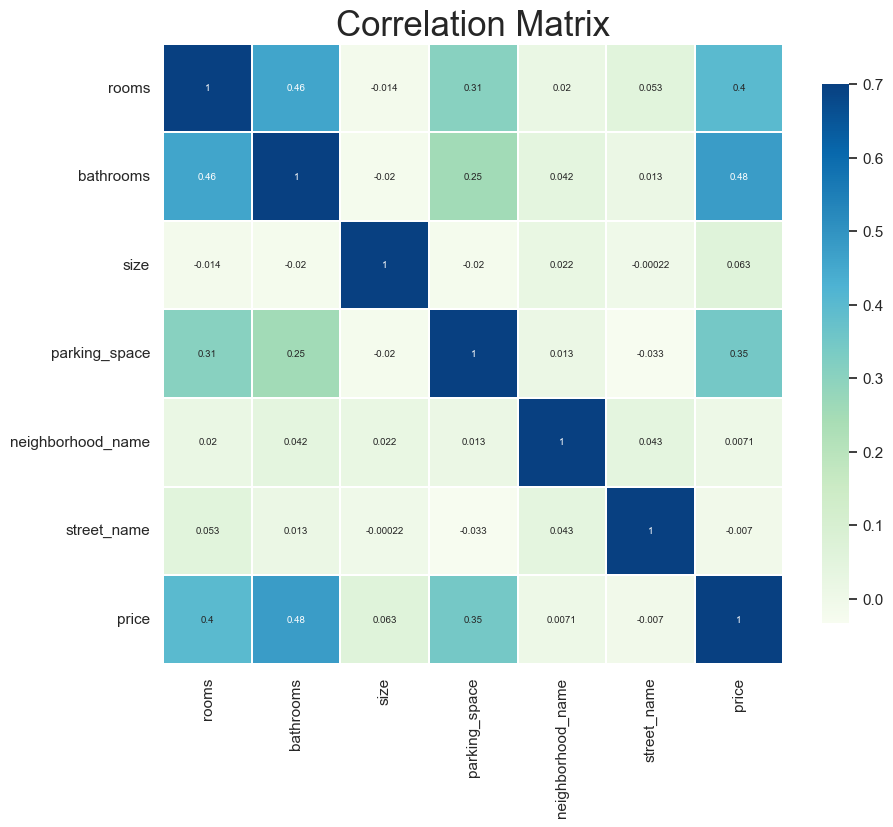

In [25]:
sns.set(style="whitegrid", font_scale=1)

plt.figure(figsize=(10,10))
plt.title('Correlation Matrix',fontsize=25)
sns.heatmap(temp.corr(),linewidths=0.25,vmax=0.7,square=True,cmap="GnBu",linecolor='w',
            annot=True, annot_kws={"size":7}, cbar_kws={"shrink": .7})

C:\Users\user\AppData\Local\Temp\ipykernel_19324\2317921059.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




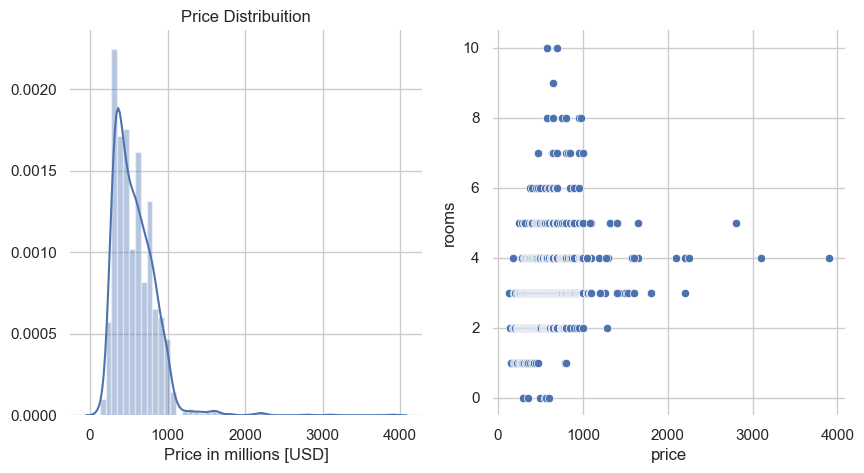

In [26]:
f, axes = plt.subplots(1, 2,figsize=(10,5))
sns.distplot(only_houses['price'], ax=axes[0])
sns.scatterplot(x='price',y='rooms', data=only_houses, ax=axes[1])
sns.despine(bottom=True, left=True)
axes[0].set(xlabel='Price in millions [USD]', ylabel='', title='Price Distribuition');

Selecionando colunas mais correlatas

In [19]:
x_properties = only_houses.loc[:, ["rooms", "bathrooms", "parking_space", "zip_code"]]
x_properties

,rooms,bathrooms,parking_space,zip_code
id,,,,
2,3,4,2,89053-073
4,3,2,1,89026-250
10,3,4,2,89053-460
12,4,4,2,89040-090
19,5,3,3,89053-520
...,...,...,...,...
9659,3,1,3,89036-256
9673,3,3,2,89065-345
9678,3,3,2,89040-485


In [20]:
label_encoder_zip_code = LabelEncoder()

In [21]:
x_properties.iloc[:, 3] = label_encoder_zip_code.fit_transform(x_properties.iloc[:, 3])

In [27]:
x_properties

,rooms,bathrooms,size,parking_space,neighborhood_name,street_name
id,,,,,,
2,3,4,325.00,2,13,554
4,3,2,822.26,1,20,322
10,3,4,259.50,2,13,734
12,4,4,274.77,2,27,140
19,5,3,431.85,3,13,106
...,...,...,...,...,...,...
9659,3,1,180.00,3,27,414
9673,3,3,181.00,2,22,567
9678,3,3,265.00,2,28,79


OneHot Encoder

In [28]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [29]:
onehot_encoder_properties = ColumnTransformer(transformers=[("OneHot", OneHotEncoder(), [4, 5])], remainder="passthrough")

In [30]:
hot_properties = onehot_encoder_properties.fit_transform(x_properties).toarray()

In [42]:
hot_properties.shape

(2044, 772)

Padronização

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
scaler_properties = MinMaxScaler()
x_scaler_properties = scaler_properties.fit_transform(hot_properties, y_properties)

In [40]:
x_scaler_properties[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

Split

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
x_properties_train, x_properties_test, y_properties_train, y_properties_test = train_test_split(x_scaler_properties, y_properties, test_size=0.25, random_state=0)

In [50]:
x_properties_train.shape, x_properties_test.shape

((1533, 772), (511, 772))

Salvando

In [51]:
import pickle

In [52]:
with open("./data/min_max_houses.pkl", mode="wb") as file:
    pickle.dump([x_properties_train, y_properties_train, x_properties_test, y_properties_test], file)